In [15]:
import numpy as np
import pandas as pd
import os
from os.path import join, exists
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import patches
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
%matplotlib inline

In [3]:
repos_path = "/home/ubuntu/projects/open_source/the-building-data-genome-project"

In [5]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), 
                   index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [57]:
temp = pd.read_csv(os.path.join(repos_path,"data/processed/temp_open_utc_complete.csv"), 
                   index_col="timestamp", parse_dates=True).tz_convert('utc')

In [58]:
def load_energy_data(meta, temporal, singlebuilding):
    # Get Data
    single_timezone = meta.T[singlebuilding].timezone
    single_start = meta.T[singlebuilding].datastart
    single_end = meta.T[singlebuilding].dataend
    return pd.DataFrame(temporal[singlebuilding].tz_convert(single_timezone).truncate(before=single_start,after=single_end))

In [201]:
# Select a building for plotting
building_id = np.random.choice(meta.index.to_numpy())
print(building_id)

UnivLab_Ashlee


In [202]:
# Load the electricity profile for the selected building (8760 hours)
energy_profile = load_energy_data(meta, temp, building_id)

In [203]:
# Load the weather profile for the selected building (8760 hours)
weather_fname = meta.loc[building_id, 'newweatherfilename']
weather = pd.read_csv(os.path.join(repos_path, "data/external/weather", weather_fname), 
                      index_col="timestamp", parse_dates=True).tz_localize('utc')
print(weather_fname)

weather0.csv


Text(0.5, 0, 'Timestamp')

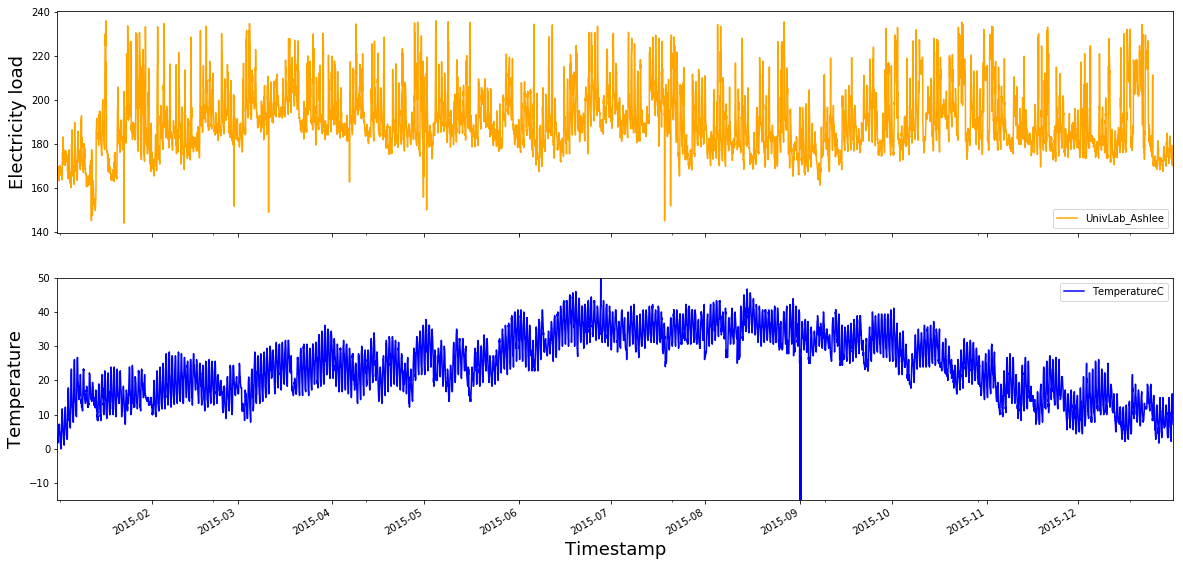

In [204]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
# plot the electricity profile
energy_profile.plot(ax=axes[0], color='orange')
# plot the temperature profile
weather[['TemperatureC']].plot(ax=axes[1], color='blue')
axes[1].set_ylim(-15, 50)
axes[0].set_ylabel('Electricity load', fontsize=18)
axes[1].set_ylabel('Temperature', fontsize=18)
axes[1].set_xlabel('Timestamp', fontsize=18)